HW7 - V.Ignatov

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/vyacheslav/Рабочий стол/Data Scientist/IV ЧЕТВЕРТЬ/I. Машинное обучение в бизнесе/7 lesson/Surgical-deepnet.csv")
data.head(3)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0


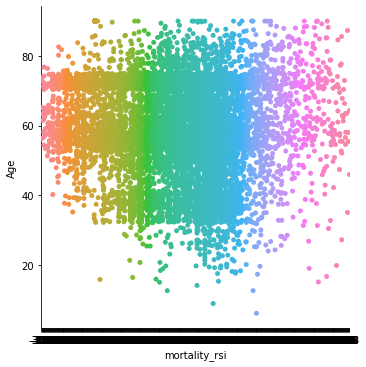

In [3]:
sns.catplot(x='mortality_rsi', y='Age', data=data)

In [4]:
data.shape

(14635, 25)

In [5]:
data.columns

Index(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication'],
      dtype='object')

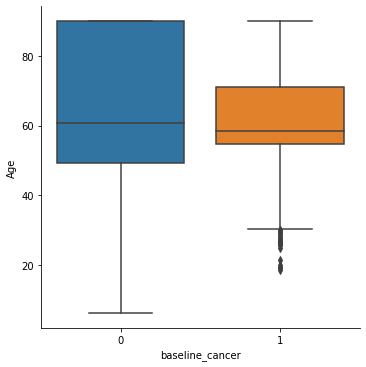

In [6]:
sns.catplot(x='baseline_cancer', y='Age', kind='box', data=data)

Просмотр пропущенных значений

In [7]:
len(data) - data.count()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

Количественные признаки

In [8]:
feature_num_names = data.drop('Age', axis=1).select_dtypes(include='float64').columns.tolist()
feature_num_names

['bmi',
 'ccsComplicationRate',
 'ccsMort30Rate',
 'complication_rsi',
 'hour',
 'mortality_rsi']

array([[<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'ccsComplicationRate'}>],
       [<AxesSubplot:title={'center':'ccsMort30Rate'}>,
        <AxesSubplot:title={'center':'complication_rsi'}>],
       [<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'mortality_rsi'}>]], dtype=object)

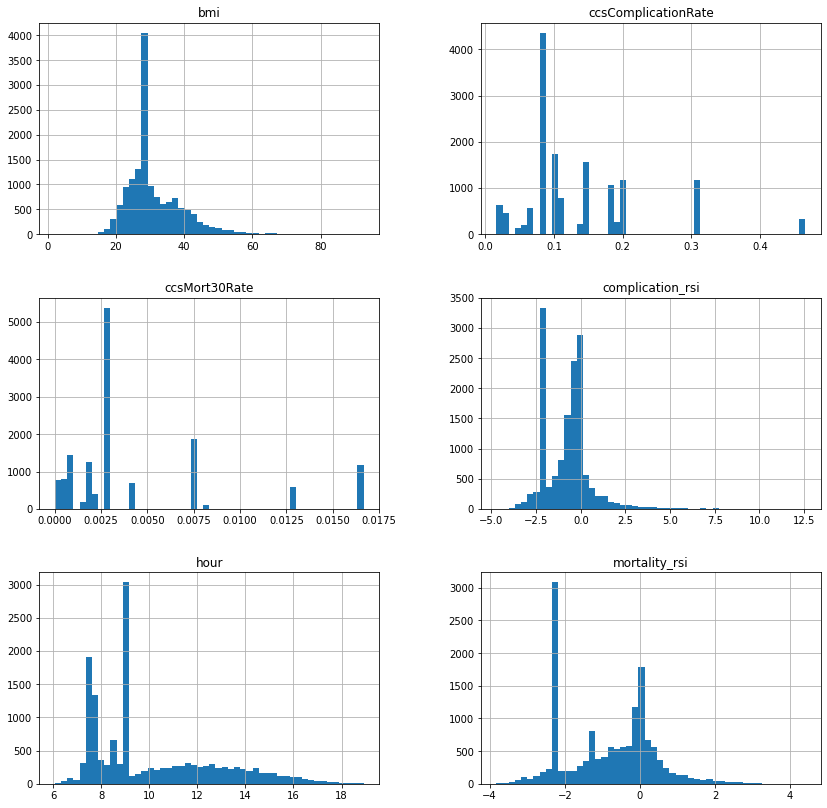

In [9]:
data[feature_num_names].hist(figsize=(14,14), bins=50, grid=True)

Взаимосвязи между количественными признаками

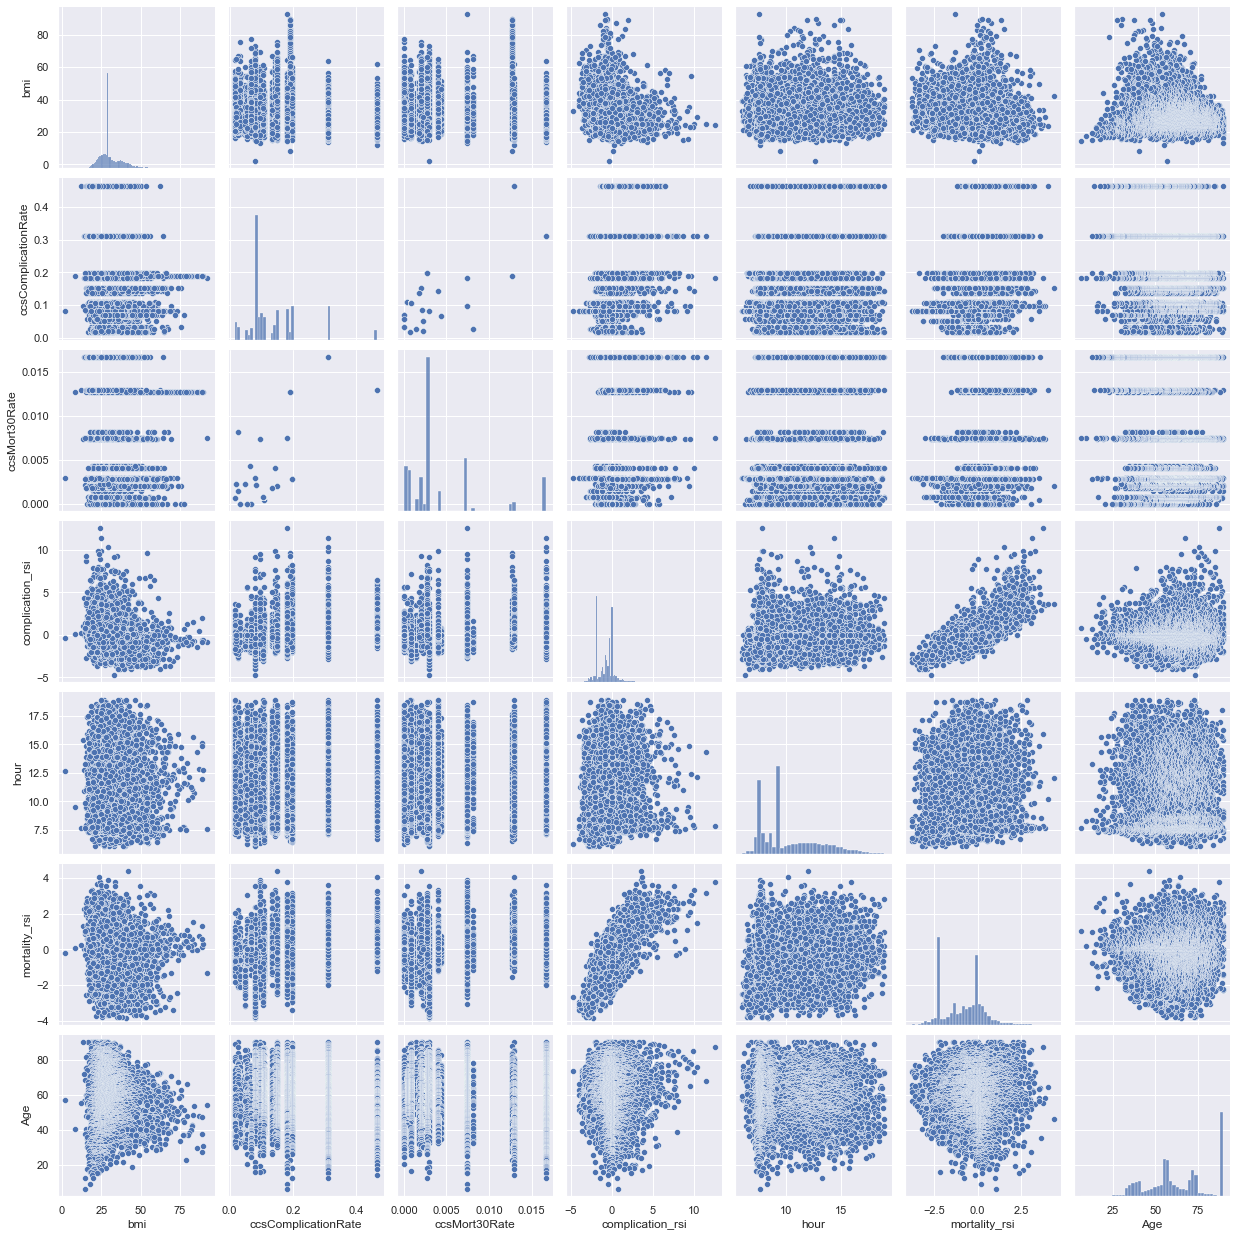

In [10]:
sns.set()
sns.pairplot(data[feature_num_names + ['Age']])

Бинарные признаки

In [11]:
feature_bin_names = data.select_dtypes(include='int64').columns.tolist()
feature_bin_names

['asa_status',
 'baseline_cancer',
 'baseline_charlson',
 'baseline_cvd',
 'baseline_dementia',
 'baseline_diabetes',
 'baseline_digestive',
 'baseline_osteoart',
 'baseline_psych',
 'baseline_pulmonary',
 'ahrq_ccs',
 'dow',
 'gender',
 'month',
 'moonphase',
 'mort30',
 'race',
 'complication']

/home/vyacheslav/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vyacheslav/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vyacheslav/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

ValueError: num must be 1 <= num <= 6, not 7

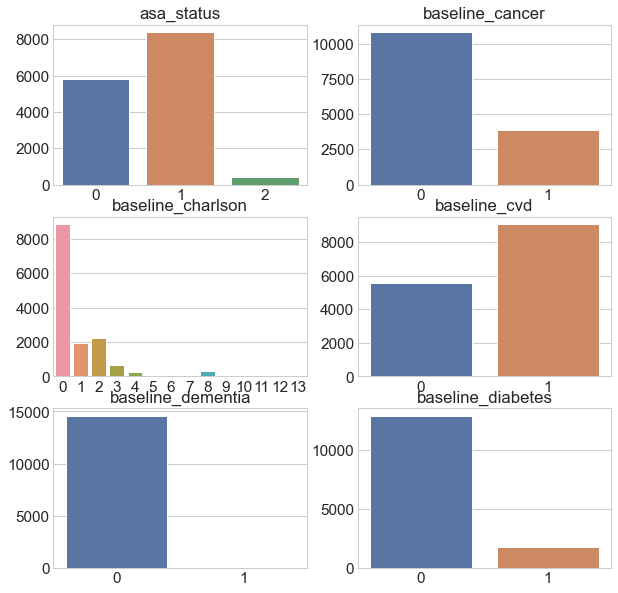

In [12]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')

for i, colname in enumerate(feature_bin_names):
    counts = data[colname].value_counts()
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)

Матрица корреляций

Text(0.5, 1.0, 'Correlation matrix')

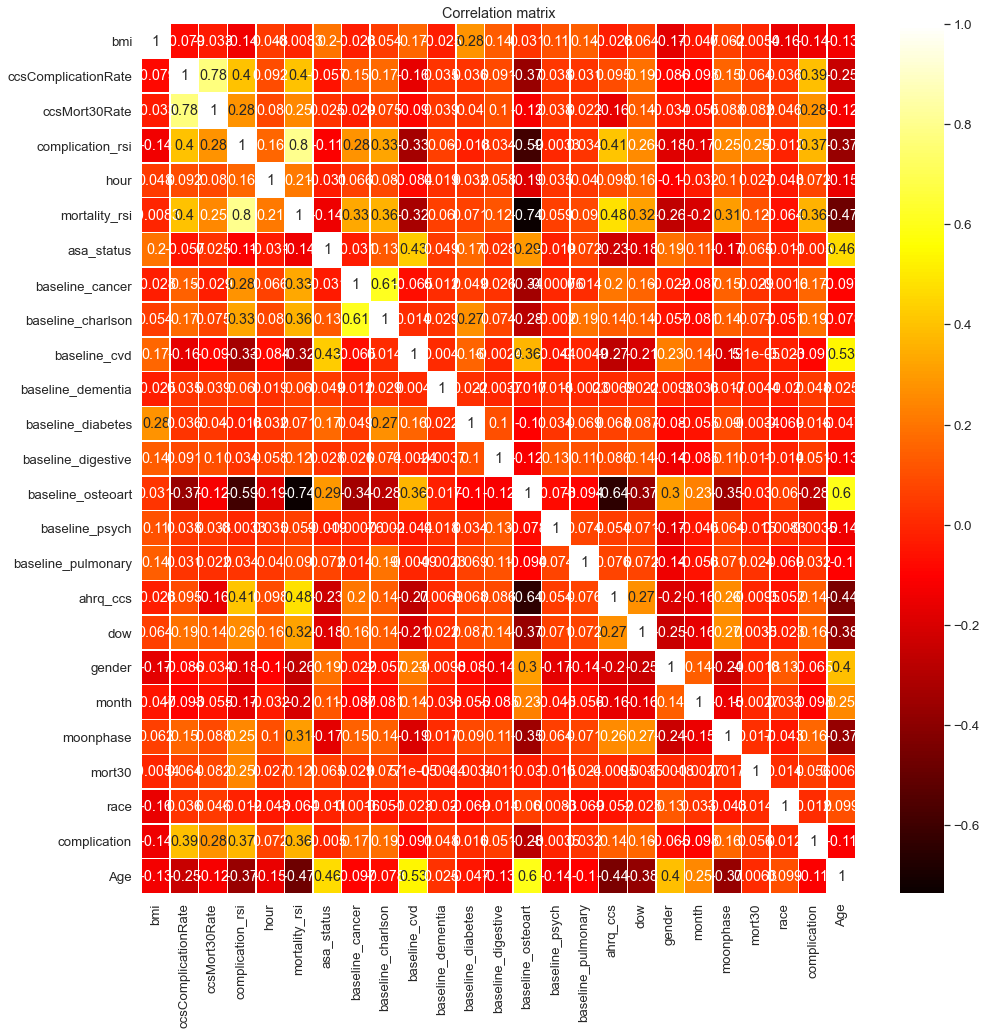

In [13]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(data[feature_num_names + feature_bin_names + ['Age']].corr(), 
            annot=True, linewidths=.5, cmap='hot')

plt.title('Correlation matrix')

In [14]:
feature_num_names1 = data[feature_num_names + ['Age']]
feature_num_names1

,bmi,ccsComplicationRate,ccsMort30Rate,complication_rsi,hour,mortality_rsi,Age
0,19.31,0.183370,0.007424,-0.57,7.63,-0.43,59.2
1,18.73,0.312029,0.016673,0.21,12.93,-0.41,59.1
2,21.85,0.150706,0.001962,0.00,7.68,0.08,59.0
3,18.49,0.056166,0.000000,-0.65,7.58,-0.32,59.0
4,19.70,0.197305,0.002764,0.00,7.88,0.00,59.0
...,...,...,...,...,...,...,...
14630,18.79,0.466129,0.012903,-0.54,7.78,-0.16,14.1
14631,19.65,0.312029,0.016673,-1.42,8.40,-0.77,12.6
14632,14.84,0.197305,0.002764,0.65,13.25,0.99,12.6
14633,17.75,0.183370,0.007424,-0.50,8.30,0.17,8.9


In [15]:
a = list(feature_num_names1.columns)
a[0]

'bmi'

In [16]:
data[a[6]].value_counts()

90.0    2923
55.2      88
54.8      87
57.5      79
56.6      79
        ... 
81.5       1
88.8       1
22.6       1
21.6       1
24.0       1
Name: Age, Length: 672, dtype: int64

In [17]:
data

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [19]:
data.columns

Index(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [73]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]
    

    
continuous_columns = ['bmi', 'Age', 'asa_status', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'hour', 'month',
       'mort30', 'mortality_rsi', 'race']
final_transformers = list()
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))
    
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [74]:
from sklearn.linear_model import LinearRegression
regressor = Pipeline([
    ('features',feats),
    ('classifier', LinearRegression()),
])

In [75]:
regressor.fit(x_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('bmi',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='bmi')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('asa_status',
                                                 Pipeline(steps=[('selector',
                                              

In [76]:
from sklearn.metrics import mean_absolute_error, r2_score

predictions =  regressor.predict(x_test)
 
mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.29487707569655414, 0.23982812715805557)

In [77]:
intercept = regressor[1].intercept_
features = pd.DataFrame(regressor[1].coef_, 
                        continuous_columns, 
                        columns=['coefficient'])
features.head()

,coefficient
bmi,-0.045857
Age,0.028000
asa_status,0.019853
ahrq_ccs,-0.002162
ccsComplicationRate,0.134725


In [78]:
import xgboost as xgb

regressor = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBRegressor()),
])

#обучим наш пайплайн
regressor.fit(x_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('bmi',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='bmi')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Age',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Age')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('asa_status',
                                                 Pipeline(steps=[('selector',
                                              

In [79]:
predictions =  regressor.predict(x_test)
 
mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.15736767412417815, 0.5950656300868784)

In [80]:
xgb_features = pd.DataFrame(regressor[1].feature_importances_, 
                        continuous_columns, 
                        columns=['coefficient'])
xgb_features.head()

,coefficient
bmi,0.074304
Age,0.240146
asa_status,0.027622
ahrq_ccs,0.042184
ccsComplicationRate,0.261421


In [83]:
import xgboost
import shap

model = xgboost.train({"learning_rate": 0.01}, 
                      xgboost.DMatrix(x_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

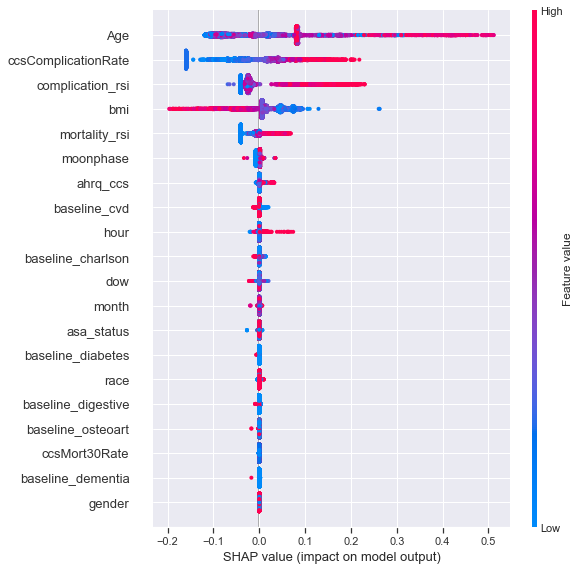

In [84]:
shap.summary_plot(shap_values, x_train)

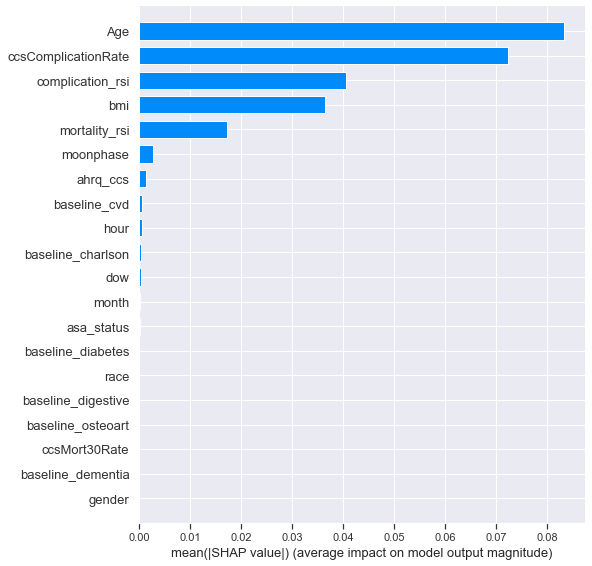

In [85]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

Выводы: 1) чем выше возраст, тем выше вероятность заболеть; 2) чем больше осложнений, тем больше вероятность заболеть; 3) чем выше осложнений в больницах, тем выше вероятность заболеть; 4) чем выше масса тела, тем выше вероятность заоблеть; 5) чем выше риск смерти в 30 дней, тем вероятность заболеть больше.